In [2]:
import pandas
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


xi number of cahrging stations ti install on piint i

excel_data_df = pandas.read_excel('Demand_data.xlsx')

[Text(0.5, 1.0, 'Number of Potential Locations')]

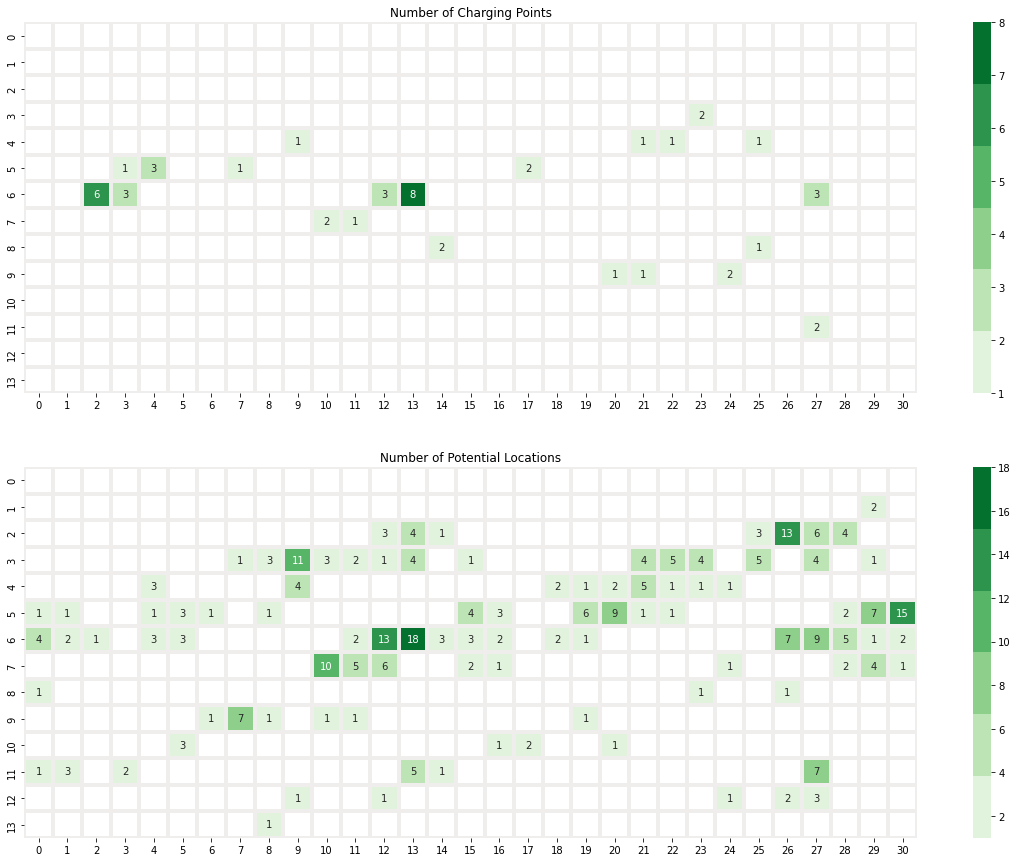

In [40]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Number of Charging Points']
alist= pandas.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
ncp_df = DataFrame(alist,index=Index, columns=Cols)
ncp_values = ncp_df.to_numpy(dtype=float)


#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Number of Potential Locations']
alist= pandas.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
npl_df = DataFrame(alist,index=Index, columns=Cols)
npl_values = npl_df.to_numpy(dtype=float)


#####################################################################
fig, ax =plt.subplots(2,1, figsize=(20, 15))
colormap = sns.color_palette("Greens")
sns.heatmap(ncp_df, annot=True, cmap=colormap, ax=ax[0], mask=ncp_values == 0, linewidths=4, linecolor='#f0eded').set(title='Number of Charging Points')
sns.heatmap(npl_df, annot=True, cmap=colormap, ax=ax[1], mask=npl_values == 0, linewidths=4, linecolor='#f0eded').set(title='Number of Potential Locations')


<AxesSubplot:>

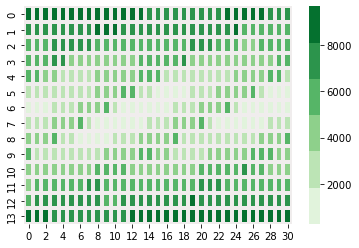

In [11]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Distance from Centre']
alist= pandas.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
dfc_df = DataFrame(alist,index=Index, columns=Cols)
dfc_values = dfc_df.to_numpy(dtype=float)

#####################################################################

sns.heatmap(dfc_df, annot=False, cmap=colormap, linewidths=4, linecolor='#f0eded')


________________________________________________

0      POLYGON ((-3.105818823440952 56.44296858524104...
1      POLYGON ((-3.105961112538962 56.44786638257236...
2      POLYGON ((-3.106103446316349 56.45276417577815...
3      POLYGON ((-3.106245824792422 56.45766196485858...
4      POLYGON ((-3.106388247986505 56.46255974981385...
                             ...                        
429    POLYGON ((-2.841505846300256 56.48913269331089...
430    POLYGON ((-2.841614325647596 56.49403083838651...
431    POLYGON ((-2.841722839098455 56.49892897943724...
432    POLYGON ((-2.841831386667599 56.50382711646336...
433    POLYGON ((-2.841939968369799 56.50872524946503...
Name: geometry, Length: 434, dtype: object


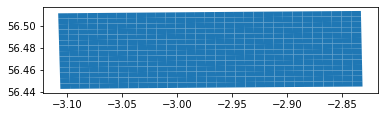

In [17]:
excel_data_df['geometry'] = excel_data_df['geometry'].apply(wkt.loads)

df2 = excel_data_df.loc[:,'geometry']
print(df2)

myPoly = gpd.GeoSeries(df2)
myPoly.plot()
plt.show()


In [21]:
 type(df2[3])
 shapely.geometry.polygon.Polygon


shapely.geometry.polygon.Polygon

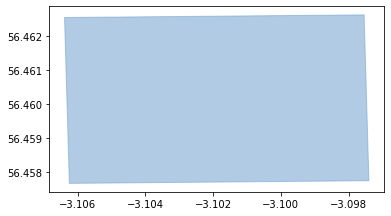

In [22]:
import matplotlib.pyplot as plt 
from descartes import PolygonPatch

BLUE = '#6699cc'
poly= df2[3]
fig = plt.figure() 
ax = fig.gca() 
ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()
